# Demand prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn import model_selection, preprocessing

train = pd.read_csv("train.tsv")
test = pd.read_csv("test.tsv")
sample_submission = pd.read_csv("sample_submission.tsv")

In [2]:
frac = 1 # fraction of learning examples used for model fitting

# sample the train set if your don't want to deel with all examples
train = train.sample(frac=frac, random_state=42)
train = train.drop(train.columns[36:], axis=1)
norm = preprocessing.MinMaxScaler()
#X = pd.DataFrame(norm.fit_transform(train.drop(['Num','y'], axis=1)))
#train['item_id'] = train['item_id'].astype('category')

X = train.drop(['Num','y'], axis=1)
#X = train[['year', 'week', 'shift', 'item_id', 'f1', 'f2']]
y = train['y']
print (len(X), len(y))

72457 72457


In [15]:
for i in np.arange(1, 60):
    X['f'+str(i)] = X['f'+str(i)] - X['f'+str(i+1)]

In [49]:
train.head()

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
44283,220152,160500,2014,13,1,20452327,129441.0,104610.0,121114.0,133780.0,...,95880.0,88520.0,107270.0,79610.0,99210.0,114561.0,93790.0,98070.0,83980.0,105240.0
50871,253360,13107,2014,23,1,20441989,4162.0,6760.0,7210.0,11330.0,...,9932.0,8908.0,10464.0,7431.0,10334.0,11548.0,8698.0,8696.0,8160.0,7570.0
13810,66191,53402,2013,21,3,20438706,24931.0,30338.0,30690.0,37930.0,...,34475.0,22390.0,27124.0,29660.0,30105.0,28054.0,31545.0,28185.0,34890.0,28790.0
10062,48676,9676,2013,15,2,20438591,11505.0,13550.0,15360.0,14750.0,...,10920.0,14030.0,8060.0,8430.0,9980.0,13930.0,6340.0,7810.0,8960.0,10260.0
37186,183929,1336,2014,3,2,20449525,0.0,0.0,0.0,0.0,...,2090.0,2470.0,1145.0,2955.0,3915.0,740.0,2260.0,1403.0,1417.0,980.0


In [16]:
X.head()

,year,week,shift,item_id,f1,f2,f3,f4,f5,f6,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,0.666667,0.230769,0.0,0.953420,0.003671,-0.006289,-0.009321,0.002602,0.001665,0.010155,...,0.005768,-0.000893,0.005362,-0.010267,-0.002148,0.012567,-6.973417e-04,-0.002903,-0.006701,0.025583
1,0.666667,0.423077,0.0,0.563821,-0.000384,-0.000296,-0.001337,0.001017,0.000177,-0.000106,...,0.000656,-0.000026,0.000588,-0.001236,-0.000130,0.001390,3.258606e-07,-0.000418,-0.000006,0.001840
2,0.333333,0.384615,1.0,0.440098,-0.000799,-0.001027,-0.003298,0.003835,-0.000994,0.001296,...,0.004196,-0.000224,-0.000492,-0.002049,0.000979,0.001680,5.474458e-04,-0.003252,0.000846,0.006999
3,0.333333,0.269231,0.5,0.435764,-0.000302,-0.000756,-0.000667,0.000416,0.000922,0.000141,...,-0.000231,0.001592,-0.000072,-0.000951,-0.000801,0.002353,-2.395075e-04,-0.000742,-0.000480,0.002494
4,0.666667,0.038462,0.5,0.847824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000004,0.000333,-0.000351,-0.000441,0.000834,-0.000188,1.396313e-04,-0.000090,0.000080,0.000238


In [48]:
train.describe()

,Num,y,year,week,shift,f1,f2,f3,f4,f5,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
count,7246.000000,7.246000e+03,7246.000000,7246.000000,7246.000000,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,...,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03
mean,179175.906431,2.019670e+05,2013.526221,26.395805,1.971985,1.334093e+05,1.354531e+05,1.340750e+05,1.336067e+05,1.345939e+05,...,1.276675e+05,1.314763e+05,1.294584e+05,1.294658e+05,1.287778e+05,1.283604e+05,1.270571e+05,1.275614e+05,1.271048e+05,1.283981e+05
std,103558.788893,4.880284e+05,0.543043,15.332671,0.812541,3.483781e+05,3.597682e+05,3.470521e+05,3.300174e+05,3.378420e+05,...,3.024955e+05,3.226879e+05,3.213190e+05,3.203854e+05,3.147623e+05,3.097233e+05,3.096824e+05,3.125756e+05,3.066667e+05,3.076876e+05
min,35.000000,1.000000e+00,2012.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,89813.000000,5.329000e+03,2013.000000,13.000000,1.000000,2.522500e+03,2.682000e+03,2.790000e+03,2.840000e+03,2.725000e+03,...,3.366500e+03,3.395750e+03,3.372750e+03,3.380000e+03,3.375000e+03,3.273750e+03,3.290000e+03,3.270000e+03,3.301250e+03,3.567500e+03
50%,180345.500000,3.431600e+04,2014.000000,26.000000,2.000000,2.022600e+04,2.077300e+04,2.067500e+04,2.078400e+04,2.082500e+04,...,2.168450e+04,2.153300e+04,2.128750e+04,2.132350e+04,2.123000e+04,2.171300e+04,2.155750e+04,2.161300e+04,2.173800e+04,2.208900e+04
75%,270172.750000,1.608850e+05,2014.000000,40.000000,3.000000,9.751450e+04,9.997100e+04,9.920250e+04,1.002060e+05,9.941100e+04,...,1.009012e+05,1.036300e+05,1.007180e+05,1.001172e+05,1.029438e+05,1.027300e+05,1.011860e+05,9.976250e+04,1.011690e+05,1.022078e+05
max,349516.000000,7.009914e+06,2015.000000,53.000000,3.000000,6.763986e+06,6.763986e+06,5.567199e+06,4.304921e+06,4.304921e+06,...,3.734967e+06,4.447661e+06,5.158335e+06,5.158335e+06,3.860242e+06,4.113735e+06,6.137594e+06,6.137594e+06,4.447661e+06,4.113735e+06


In [5]:
%%time


model = RandomForestRegressor(n_estimators=1000,random_state=43)
model.fit(X, y)

ValueError: Number of features of the model must match the input. Model n_features is 34 and input n_features is 64 

In [8]:
test = test.drop(test.columns[35:], axis=1)
preds = model.predict(test.drop(['Num'], axis=1))

print (len(preds))
print (len(sample_submission))

2016
2016


In [30]:
def smape(model, X, y):
    x = model.predict(X)
    return np.mean( abs(x-y) / (abs(x) + abs(y))) * 2 

In [60]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=10, random_state=43)
score = model_selection.cross_val_score(model, train.drop(['Num','y'], axis=1), y, scoring = smape, cv = 3)  
score

array([ 0.30467241,  0.32148742,  0.31740413])

In [6]:
sample_submission['y'] = preds

In [136]:
preds = sample_submission['y']

In [7]:
sample_submission.head(5)

,Num,y
0,348622,1497.214505
1,348623,27031.966394
2,348624,297543.209397
3,348625,29469.367211
4,348626,16.099081


In [8]:
# In GBM you can get some negative predictions:
print (sample_submission[sample_submission['y'] < 0])

Empty DataFrame
Columns: [Num, y]
Index: []


In [66]:
sample_submission['y'] = sample_submission['y'].map(lambda x: x if x > 0 else 0.0)

In [9]:
sample_submission.to_csv("baseline_submission.tsv", sep=',', index=False)

In [68]:
train.head()

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
44283,220152,160500,2014,13,1,20452327,129441.0,104610.0,121114.0,133780.0,...,95880.0,88520.0,107270.0,79610.0,99210.0,114561.0,93790.0,98070.0,83980.0,105240.0
50871,253360,13107,2014,23,1,20441989,4162.0,6760.0,7210.0,11330.0,...,9932.0,8908.0,10464.0,7431.0,10334.0,11548.0,8698.0,8696.0,8160.0,7570.0
13810,66191,53402,2013,21,3,20438706,24931.0,30338.0,30690.0,37930.0,...,34475.0,22390.0,27124.0,29660.0,30105.0,28054.0,31545.0,28185.0,34890.0,28790.0
10062,48676,9676,2013,15,2,20438591,11505.0,13550.0,15360.0,14750.0,...,10920.0,14030.0,8060.0,8430.0,9980.0,13930.0,6340.0,7810.0,8960.0,10260.0
37186,183929,1336,2014,3,2,20449525,0.0,0.0,0.0,0.0,...,2090.0,2470.0,1145.0,2955.0,3915.0,740.0,2260.0,1403.0,1417.0,980.0


In [24]:
import numpy as np
def smape(x, y):
    return np.mean( abs(x-y) / (abs(x) + abs(y)) * 2 ) * 100

In [16]:
preds1 = model.predict(X)
smape(train['y'], preds1)

0.49000208277202462

In [57]:
test.head()

,Num,year,week,shift,item_id,f1,f2,f3,f4,f5,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,348622,2015,3,3,20447918,960.0,820.0,1128.0,1801.0,1045.0,...,1510.0,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0
1,348623,2015,3,3,20447902,9086.0,12585.0,11595.0,9685.0,12917.0,...,22055.0,14235.0,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0
2,348624,2015,3,3,20447732,115087.0,147287.0,176065.0,143105.0,202069.0,...,302165.0,162232.0,221622.0,256605.0,240047.0,236630.0,206697.0,245652.0,286179.0,285904.0
3,348625,2015,3,3,20443951,20900.0,24420.0,27068.0,20460.0,25580.0,...,39055.0,14445.0,22450.0,22093.0,31175.0,23355.0,15358.0,18930.0,29643.0,33970.0
4,348626,2015,3,3,20443944,4430.0,5864.0,3310.0,1853.0,2836.0,...,120.0,130.0,60.0,30.0,50.0,20.0,20.0,30.0,0.0,0.0


In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

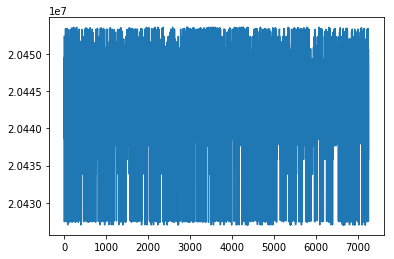

In [73]:
plt.plot(np.arange(len(train)), train['item_id'])
plt.show()

In [48]:
print(max(train['item_id']), min(train['item_id']),max(train['item_id']) - min(train['item_id']))

20453563 20427028 26535


In [49]:
print(max(test['item_id']), min(test['item_id']),max(test['item_id']) - min(test['item_id']))

20453563 20427028 26535


In [60]:
import seaborn as sns

In [10]:
X.columns = train.columns[2:]
X.head()

,year,week,shift,item_id,f1,f2,f3,f4,f5,f6,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
0,0.666667,0.230769,0.0,0.953420,0.019137,0.015466,0.021755,0.031076,0.028474,0.026809,...,0.025671,0.019903,0.020795,0.015433,0.025700,0.027848,0.015281,0.015979,0.018882,0.025583
1,0.666667,0.423077,0.0,0.563821,0.000615,0.000999,0.001295,0.002632,0.001614,0.001437,...,0.002659,0.002003,0.002029,0.001441,0.002677,0.002807,0.001417,0.001417,0.001835,0.001840
2,0.333333,0.384615,1.0,0.440098,0.003686,0.004485,0.005513,0.008811,0.004976,0.005969,...,0.009230,0.005034,0.005258,0.005750,0.007799,0.006820,0.005140,0.004592,0.007845,0.006999
3,0.333333,0.269231,0.5,0.435764,0.001701,0.002003,0.002759,0.003426,0.003011,0.002088,...,0.002924,0.003154,0.001563,0.001634,0.002585,0.003386,0.001033,0.001272,0.002015,0.002494
4,0.666667,0.038462,0.5,0.847824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000560,0.000555,0.000222,0.000573,0.001014,0.000180,0.000368,0.000229,0.000319,0.000238


In [51]:
train[train.columns[5:]].corr()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
f1,1.000000,0.922737,0.894385,0.905041,0.941335,0.944075,0.903204,0.894824,0.914517,0.950694,...,0.881676,0.900726,0.936209,0.898258,0.878711,0.883834,0.929425,0.898046,0.872077,0.873076
f2,0.922737,1.000000,0.894759,0.883747,0.905443,0.955039,0.929231,0.885373,0.885697,0.920615,...,0.854027,0.881175,0.905570,0.937970,0.867798,0.856830,0.888115,0.931455,0.875111,0.854806
f3,0.894385,0.894759,1.000000,0.922522,0.906993,0.914964,0.960270,0.930893,0.900361,0.908514,...,0.910011,0.880815,0.890501,0.906787,0.926952,0.879513,0.879700,0.890531,0.935512,0.885337
f4,0.905041,0.883747,0.922522,1.000000,0.931704,0.918893,0.912938,0.965398,0.946185,0.919111,...,0.937273,0.930666,0.904930,0.896287,0.921013,0.933034,0.898679,0.894488,0.904640,0.934022
f5,0.941335,0.905443,0.906993,0.931704,1.000000,0.929008,0.915304,0.920230,0.959830,0.941246,...,0.906790,0.940993,0.924541,0.900662,0.898567,0.915610,0.928959,0.900056,0.890925,0.898494
f6,0.944075,0.955039,0.914964,0.918893,0.929008,1.000000,0.941536,0.919315,0.918256,0.961546,...,0.893103,0.907250,0.943036,0.936108,0.896684,0.890387,0.913704,0.936549,0.897247,0.886435
f7,0.903204,0.929231,0.960270,0.912938,0.915304,0.941536,1.000000,0.926247,0.905130,0.922656,...,0.904871,0.887232,0.906612,0.940989,0.917978,0.885403,0.895520,0.919263,0.938185,0.887606
f8,0.894824,0.885373,0.930893,0.965398,0.920230,0.919315,0.926247,1.000000,0.933889,0.919884,...,0.949216,0.917709,0.908404,0.903867,0.942922,0.924945,0.897782,0.898813,0.921295,0.935839
f9,0.914517,0.885697,0.900361,0.946185,0.959830,0.918256,0.905130,0.933889,1.000000,0.934838,...,0.924756,0.954753,0.915101,0.897574,0.909839,0.939961,0.915266,0.895666,0.898963,0.914593
f10,0.950694,0.920615,0.908514,0.919111,0.941246,0.961546,0.922656,0.919884,0.934838,1.000000,...,0.910989,0.915727,0.955846,0.919404,0.905044,0.902243,0.937163,0.919993,0.899638,0.896708


In [39]:
print(train[['f1', 'f31']])

              f1        f31
44283   129441.0   129441.0
50871     4162.0     4162.0
13810    24931.0    24931.0
10062    11505.0    11505.0
37186        0.0        0.0
11779    58566.0    58566.0
19487     8280.0     8280.0
13814    54836.0    54836.0
9022   2051366.0  2051366.0
47174    54018.0    54018.0
8188     36158.0    36158.0
45417    29688.0    29688.0
33970     2420.0     2420.0
63326    19550.0    19550.0
24847    22475.0    22475.0
28049        0.0        0.0
5929      6078.0     6078.0
41877     3820.0     3820.0
28935    15270.0    15270.0
49540    11790.0    11790.0
65377     3550.0     3550.0
72408     8260.0     8260.0
15598  1528526.0  1528526.0
13552     2092.0     2092.0
53764     6950.0     6950.0
4475     32985.0    32985.0
10672    25380.0    25380.0
28265    26720.0    26720.0
48272    34632.0    34632.0
484       3845.0     3845.0
...          ...        ...
14944      767.0      767.0
57165    20760.0    20760.0
57335    27530.0    27530.0
1966    372881.0   3

In [44]:
train.drop(train.columns[36:], axis=1)

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
44283,220152,160500,2014,13,1,20452327,129441.0,104610.0,121114.0,133780.0,...,95880.0,88520.0,107270.0,79610.0,99210.0,114561.0,93790.0,98070.0,83980.0,105240.0
50871,253360,13107,2014,23,1,20441989,4162.0,6760.0,7210.0,11330.0,...,9932.0,8908.0,10464.0,7431.0,10334.0,11548.0,8698.0,8696.0,8160.0,7570.0
13810,66191,53402,2013,21,3,20438706,24931.0,30338.0,30690.0,37930.0,...,34475.0,22390.0,27124.0,29660.0,30105.0,28054.0,31545.0,28185.0,34890.0,28790.0
10062,48676,9676,2013,15,2,20438591,11505.0,13550.0,15360.0,14750.0,...,10920.0,14030.0,8060.0,8430.0,9980.0,13930.0,6340.0,7810.0,8960.0,10260.0
37186,183929,1336,2014,3,2,20449525,0.0,0.0,0.0,0.0,...,2090.0,2470.0,1145.0,2955.0,3915.0,740.0,2260.0,1403.0,1417.0,980.0
11779,58653,28711,2013,17,1,20442117,58566.0,30476.0,27444.0,35176.0,...,23909.0,22744.0,47030.0,17352.0,18392.0,20060.0,35480.0,18256.0,16277.0,14780.0
19487,96549,14345,2013,28,1,20427463,8280.0,8900.0,14780.0,5194.0,...,8190.0,7600.0,11130.0,11349.0,16290.0,7410.0,5360.0,10620.0,12701.0,8141.0
13814,66195,202652,2013,21,3,20438803,54836.0,73042.0,77779.0,134052.0,...,112410.0,60409.0,78766.0,81732.0,140618.0,142027.0,67727.0,74731.0,102966.0,117584.0
9022,44885,1248640,2013,13,1,20442103,2051366.0,816429.0,825582.0,1022983.0,...,844620.0,949393.0,852544.0,730940.0,807951.0,894810.0,1263319.0,582537.0,742668.0,756275.0
47174,233652,130189,2014,18,2,20448095,54018.0,53682.0,52926.0,55286.0,...,56305.0,63654.0,62497.0,57887.0,48204.0,72346.0,64235.0,69257.0,67125.0,68337.0


выкинуть week

In [53]:
oldtrain = train
train['week'] = train['week'] + (train['year']-min(train['year'])*np.ones_like(train['year']))*60
train.head()

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
44283,220152,160500,2014,133,1,20452327,129441.0,104610.0,121114.0,133780.0,...,95880.0,88520.0,107270.0,79610.0,99210.0,114561.0,93790.0,98070.0,83980.0,105240.0
50871,253360,13107,2014,143,1,20441989,4162.0,6760.0,7210.0,11330.0,...,9932.0,8908.0,10464.0,7431.0,10334.0,11548.0,8698.0,8696.0,8160.0,7570.0
13810,66191,53402,2013,81,3,20438706,24931.0,30338.0,30690.0,37930.0,...,34475.0,22390.0,27124.0,29660.0,30105.0,28054.0,31545.0,28185.0,34890.0,28790.0
10062,48676,9676,2013,75,2,20438591,11505.0,13550.0,15360.0,14750.0,...,10920.0,14030.0,8060.0,8430.0,9980.0,13930.0,6340.0,7810.0,8960.0,10260.0
37186,183929,1336,2014,123,2,20449525,0.0,0.0,0.0,0.0,...,2090.0,2470.0,1145.0,2955.0,3915.0,740.0,2260.0,1403.0,1417.0,980.0


In [56]:
train=train.drop('year', axis=1)

In [59]:
train['shift'] = train['shift'].astype('category')

In [61]:
train = oldtrain

In [68]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
select = SelectKBest(chi2, k=20)
X_new = pd.DataFrame(select.fit_transform(train.drop('Num', axis=1), train['y']))

In [69]:
X_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,160500.0,129441.0,104610.0,121114.0,133780.0,122580.0,126830.0,102220.0,117450.0,113460.0,150970.0,72710.0,139070.0,91350.0,116210.0,162615.0,99390.0,55160.0,107270.0,79610.0
1,13107.0,4162.0,6760.0,7210.0,11330.0,6950.0,6798.0,9470.0,13332.0,6860.0,3270.0,8200.0,6906.0,8184.0,9144.0,7075.0,7319.0,8162.0,10464.0,7431.0
2,53402.0,24931.0,30338.0,30690.0,37930.0,21420.0,28240.0,28685.0,39205.0,22670.0,29780.0,31855.0,16835.0,27255.0,25706.0,24015.0,27735.0,26515.0,27124.0,29660.0
3,9676.0,11505.0,13550.0,15360.0,14750.0,12961.0,9880.0,11950.0,11269.0,15840.0,7720.0,11150.0,7990.0,12120.0,12370.0,5730.0,4880.0,13690.0,8060.0,8430.0
4,1336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1145.0,2955.0
5,28711.0,58566.0,30476.0,27444.0,35176.0,37784.0,61653.0,24411.0,33302.0,40347.0,66246.0,21820.0,76585.0,14414.0,17140.0,25557.0,50060.0,18640.0,47030.0,17352.0
6,14345.0,8280.0,8900.0,14780.0,5194.0,4070.0,8050.0,9540.0,10020.0,5520.0,7870.0,7710.0,7612.0,7716.0,8643.0,7950.0,8896.0,13340.0,11130.0,11349.0
7,202652.0,54836.0,73042.0,77779.0,134052.0,61791.0,56961.0,80549.0,96744.0,81685.0,81735.0,89350.0,44214.0,60180.0,61831.0,57998.0,57975.0,65771.0,78766.0,81732.0
8,1248640.0,2051366.0,816429.0,825582.0,1022983.0,1584683.0,1117102.0,866330.0,927534.0,1321817.0,1745788.0,670413.0,1530131.0,781707.0,1019808.0,2289616.0,610850.0,383526.0,852544.0,730940.0
9,130189.0,54018.0,53682.0,52926.0,55286.0,50816.0,64685.0,27994.0,62230.0,52830.0,68099.0,43832.0,72417.0,49369.0,20720.0,53756.0,56800.0,49161.0,62497.0,57887.0


In [77]:
scoring = []
for k in np.arange(2, 34, 5):
    model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=10, random_state=43)
    select = SelectKBest(chi2, k=k)
    X_new = pd.DataFrame(select.fit_transform(X, y))
    score = model_selection.cross_val_score(model, X_new, y, scoring = smape, cv = 3)
    scoring += [score]
scoring

[array([ 0.56922225,  0.56756745,  0.56253461]),
 array([ 0.45635653,  0.46215665,  0.46332798]),
 array([ 0.42789679,  0.44101677,  0.43455942]),
 array([ 0.3890651 ,  0.39694182,  0.40246978]),
 array([ 0.37934448,  0.39021273,  0.39799768]),
 array([ 0.3400635 ,  0.34941408,  0.34412443]),
 array([ 0.30415774,  0.31779834,  0.31118603])]

In [76]:
scoring

[array([ 0.56922225,  0.56756745,  0.56253461]),
 array([ 0.46673865,  0.47736399,  0.47457876]),
 array([ 0.46216281,  0.46965718,  0.47266947]),
 array([ 0.45752448,  0.46927283,  0.46609753]),
 array([ 0.45581238,  0.46516482,  0.46562932]),
 array([ 0.45635653,  0.46215665,  0.46332798]),
 array([ 0.45086363,  0.46256154,  0.45597952]),
 array([ 0.44886684,  0.45855217,  0.45742741]),
 array([ 0.43536572,  0.44200494,  0.44004283]),
 array([ 0.43188841,  0.4363846 ,  0.43944815]),
 array([ 0.42789679,  0.44101677,  0.43455942]),
 array([ 0.42884743,  0.43962314,  0.43743576]),
 array([ 0.42894683,  0.43557049,  0.43141016]),
 array([ 0.39626339,  0.41582018,  0.4128297 ]),
 array([ 0.38799203,  0.39740595,  0.40102063]),
 array([ 0.3890651 ,  0.39694182,  0.40246978]),
 array([ 0.38396174,  0.39566388,  0.40119422]),
 array([ 0.38483395,  0.39651256,  0.400814  ]),
 array([ 0.38480229,  0.39424832,  0.39799817]),
 array([ 0.37969696,  0.3915998 ,  0.39610419]),
 array([ 0.37934448,

In [82]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 
lr = LinearRegression()
#select 25 the most informative features
rfe = RFE(lr, 15) 
selector = rfe.fit(X,y)

In [84]:
X_new = selector.fit_transform(X, y)

In [85]:
pd.DataFrame(X_new)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2014.0,13.0,1.0,20452327.0,129441.0,104610.0,113460.0,72710.0,116210.0,107270.0,79610.0,99210.0,93790.0,98070.0,83980.0
1,2014.0,23.0,1.0,20441989.0,4162.0,6760.0,6860.0,8200.0,9144.0,10464.0,7431.0,10334.0,8698.0,8696.0,8160.0
2,2013.0,21.0,3.0,20438706.0,24931.0,30338.0,22670.0,31855.0,25706.0,27124.0,29660.0,30105.0,31545.0,28185.0,34890.0
3,2013.0,15.0,2.0,20438591.0,11505.0,13550.0,15840.0,11150.0,12370.0,8060.0,8430.0,9980.0,6340.0,7810.0,8960.0
4,2014.0,3.0,2.0,20449525.0,0.0,0.0,0.0,0.0,0.0,1145.0,2955.0,3915.0,2260.0,1403.0,1417.0
5,2013.0,17.0,1.0,20442117.0,58566.0,30476.0,40347.0,21820.0,17140.0,47030.0,17352.0,18392.0,35480.0,18256.0,16277.0
6,2013.0,28.0,1.0,20427463.0,8280.0,8900.0,5520.0,7710.0,8643.0,11130.0,11349.0,16290.0,5360.0,10620.0,12701.0
7,2013.0,21.0,3.0,20438803.0,54836.0,73042.0,81685.0,89350.0,61831.0,78766.0,81732.0,140618.0,67727.0,74731.0,102966.0
8,2013.0,13.0,1.0,20442103.0,2051366.0,816429.0,1321817.0,670413.0,1019808.0,852544.0,730940.0,807951.0,1263319.0,582537.0,742668.0
9,2014.0,18.0,2.0,20448095.0,54018.0,53682.0,52830.0,43832.0,20720.0,62497.0,57887.0,48204.0,64235.0,69257.0,67125.0


In [106]:
model = RandomForestRegressor(n_estimators=1000, random_state=43)
score = model_selection.cross_val_score(model, X, y, scoring = smape, cv = 3)
score

array([ 0.27574246,  0.28647003,  0.27810319])

In [123]:
set_of_ind = set(train['item_id'])
len(set_of_ind)

279

In [124]:
set_of_ind = set(test['item_id'])
len(set_of_ind)

227

In [4]:
set_of_ind = set(a)
len(set_of_ind)

286

In [3]:
a = train['item_id']
a = a.append(test['item_id'])

In [5]:
q = {k:j for j, k in enumerate(set_of_ind)}

In [6]:
train['item_id'] = [q[i] for i in train['item_id']]

In [164]:
train.head()

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
44283,220152,160500,2014,13,1,268,129441.0,104610.0,121114.0,133780.0,...,95880.0,88520.0,107270.0,79610.0,99210.0,114561.0,93790.0,98070.0,83980.0,105240.0
50871,253360,13107,2014,23,1,226,4162.0,6760.0,7210.0,11330.0,...,9932.0,8908.0,10464.0,7431.0,10334.0,11548.0,8698.0,8696.0,8160.0,7570.0
13810,66191,53402,2013,21,3,110,24931.0,30338.0,30690.0,37930.0,...,34475.0,22390.0,27124.0,29660.0,30105.0,28054.0,31545.0,28185.0,34890.0,28790.0
10062,48676,9676,2013,15,2,33,11505.0,13550.0,15360.0,14750.0,...,10920.0,14030.0,8060.0,8430.0,9980.0,13930.0,6340.0,7810.0,8960.0,10260.0
37186,183929,1336,2014,3,2,152,0.0,0.0,0.0,0.0,...,2090.0,2470.0,1145.0,2955.0,3915.0,740.0,2260.0,1403.0,1417.0,980.0


In [31]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=10, random_state=43)
score = model_selection.cross_val_score(model, train.drop(['Num', 'y'], axis=1) , y, scoring = smape, cv = 3)  
score

array([ 0.29532144,  0.31107464,  0.30933613])

In [50]:
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn import preprocessing

In [61]:
encoder = preprocessing.OneHotEncoder()
X_cat_oh = encoder.fit_transform(train[['year', 'item_id']])

In [104]:
new_features = pd.DataFrame(X_cat_oh.toarray())
new_features.columns = ['2012', '2013', '2014', '2015'] + [str(i) for i in np.arange(len(set_of_ind))]

In [112]:
old_features = train[['year', 'item_id']]
pretrain = train.drop(['year', 'item_id'], axis=1)
retrain = pd.DataFrame(np.hstack([pretrain, new_features]))
retrain.columns = pretrain.columns.append(new_features.columns)
retrain

,Num,y,week,shift,f1,f2,f3,f4,f5,f6,...,269,270,271,272,273,274,275,276,277,278
0,220152.0,160500.0,13.0,1.0,129441.0,104610.0,121114.0,133780.0,122580.0,126830.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,253360.0,13107.0,23.0,1.0,4162.0,6760.0,7210.0,11330.0,6950.0,6798.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,66191.0,53402.0,21.0,3.0,24931.0,30338.0,30690.0,37930.0,21420.0,28240.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,48676.0,9676.0,15.0,2.0,11505.0,13550.0,15360.0,14750.0,12961.0,9880.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,183929.0,1336.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,58653.0,28711.0,17.0,1.0,58566.0,30476.0,27444.0,35176.0,37784.0,61653.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,96549.0,14345.0,28.0,1.0,8280.0,8900.0,14780.0,5194.0,4070.0,8050.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,66195.0,202652.0,21.0,3.0,54836.0,73042.0,77779.0,134052.0,61791.0,56961.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,44885.0,1248640.0,13.0,1.0,2051366.0,816429.0,825582.0,1022983.0,1584683.0,1117102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,233652.0,130189.0,18.0,2.0,54018.0,53682.0,52926.0,55286.0,50816.0,64685.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
model = GradientBoostingRegressor(learning_rate=0.05, n_estimators=1000, max_depth=10, random_state=43)
score = model_selection.cross_val_score(model, retrain.drop(['Num', 'y'], axis=1) , y, scoring = smape, cv = 3)  
score

array([ 0.30267925,  0.31281607,  0.31366256])

In [121]:
#tr = train
#train = train.select(lambda x: train['year'][x]==2015)
train = tr

In [130]:
it33 = train.select(lambda x : train['week'][x]-train['shift'][x]==1)
wer = train.select(lambda x : train['week'][x]==1)
wer.select(lambda x : train['item_id'][x]==20441789).head()

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
246,246,14538,2013,1,2,20441789,1440.0,14601.0,12127.0,17498.0,...,13531.0,15015.0,18574.0,9146.0,14865.0,13051.0,17389.0,10739.0,13260.0,15570.0
707,3479,14538,2013,1,1,20441789,14601.0,12127.0,17498.0,22130.0,...,15015.0,18574.0,9146.0,14865.0,13051.0,17389.0,10739.0,13260.0,15570.0,22750.0
35392,174167,15761,2014,1,3,20441789,14425.0,18501.0,11319.0,8820.0,...,9879.0,10275.0,10065.0,13480.0,5350.0,10930.0,9590.0,12910.0,7015.0,9840.0
35842,177272,15761,2014,1,2,20441789,18501.0,11319.0,8820.0,13950.0,...,10275.0,10065.0,13480.0,5350.0,10930.0,9590.0,12910.0,7015.0,9840.0,13107.0
36287,180372,15761,2014,1,1,20441789,11319.0,8820.0,13950.0,12410.0,...,10065.0,13480.0,5350.0,10930.0,9590.0,12910.0,7015.0,9840.0,13107.0,15434.0


In [132]:
it33.select(lambda x : train['item_id'][x]==20441789).head()

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60
1399,6942,10674,2013,2,1,20441789,12127.0,17498.0,22130.0,13160.0,...,18574.0,9146.0,14865.0,13051.0,17389.0,10739.0,13260.0,15570.0,22750.0,9030.0
1632,7175,18403,2013,3,2,20441789,12127.0,17498.0,22130.0,13160.0,...,18574.0,9146.0,14865.0,13051.0,17389.0,10739.0,13260.0,15570.0,22750.0,9030.0
1857,7400,17291,2013,4,3,20441789,12127.0,17498.0,22130.0,13160.0,...,18574.0,9146.0,14865.0,13051.0,17389.0,10739.0,13260.0,15570.0,22750.0,9030.0
36951,183694,7937,2014,2,1,20441789,8820.0,13950.0,12410.0,11050.0,...,13480.0,5350.0,10930.0,9590.0,12910.0,7015.0,9840.0,13107.0,15434.0,9790.0
37171,183914,12654,2014,3,2,20441789,8820.0,13950.0,12410.0,11050.0,...,13480.0,5350.0,10930.0,9590.0,12910.0,7015.0,9840.0,13107.0,15434.0,9790.0


In [134]:
15761/9790

1.6099080694586312

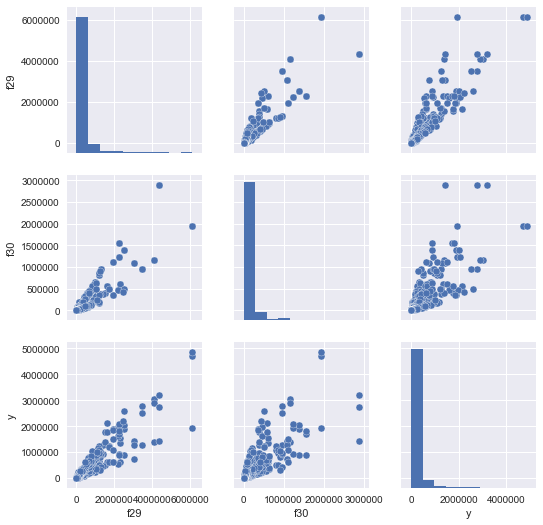

In [123]:
plt.figure()
g = sns.pairplot(it33[['f29', 'f30', 'y']])
plt.show()

In [114]:
zzz = it33.select(lambda x:train['f30'][x]!=0 and train['f29'][x]!=0)
print(np.median(zzz['y']/zzz['f30']), np.mean(zzz['f30']/zzz['f29']), np.mean(zzz['y']/zzz['f29']))

5.69357050581 0.237972089381 1.23567433254


In [138]:
#train['week'] = train['week'] + (train['year']-min(train['year'])*np.ones_like(train['year']))*56

In [ ]:
const = [5.69357050581, ]

In [172]:
train['item_id'] = train['item_id'].astype('int')

Для каждой недели строим свой классификатор

In [7]:
arr = train[['year', 'week']].as_matrix()
hashed_weeks = (test['week'] + (test['year']-min(test['year'])*np.ones_like(test['year']))*60)
wks = (train['week'] + (train['year']-min(train['year'])*np.ones_like(train['year']))*60)

In [8]:
set_of_weeks = set(hashed_weeks)

In [11]:
class estimator:
    def __init__(self,set_of_weeks, alpha=0.9):
        mod = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=10, random_state=43)
        weeks = set_of_weeks
        models = [GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=10, random_state=43) for i in set_of_weeks.intersection(wks)]
    def fit(self,X, y):
        #в x должен быть y
        X['hashed_weeks'] = (X['week'] + (X['year']-min(X['year'])*np.ones_like(X['year']))*60)
        mod.fit(X.drop('y', axis=1), y)
        for i, w in enumerate(set_of_weeks.intersection(wks)):
            tr = X.select(lambda x:X['hashed_weeks'][x]==w)
            models[i].fit(tr.drop(['hashed_weeks', 'y'], axis=1), tr['y'])
    def predict(self,X):
        y = zeros(len(X))
        hashed_weeks = (X['week'] + (X['year']-min(X['year'])*np.ones_like(X['year']))*60)
        i=0
        for r in X.iterrows():
            if(hashed_weeks[i] in wks):
                y[i] = model[hashed_weeks[i]].predict(r)
            else:
                y[i] = mod[hashed_weeks[i]].predict(r)
        return y
    def get_params(self, deep=False):
        return {'set_of_weeks':set_of_weeks}

In [14]:
mod = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=10, random_state=43)
models = [GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=10, random_state=43) for i in set_of_weeks.intersection(wks)]


In [ ]:
X = train.drop('Num', axis=1)
mod.fit(X.drop('y', axis=1), y)
X['hashed_weeks'] = (X['week'] + (X['year']-min(X['year'])*np.ones_like(X['year']))*60)
for i, w in enumerate(set_of_weeks.intersection(wks)):
    if(i%100 == 0):
        print(i)
    tr = X.select(lambda x:X['hashed_weeks'][x]==w)
    models[i].fit(tr.drop(['hashed_weeks', 'y'], axis=1), tr['y'])

In [ ]:
X = test.drop('Num', axis=1)
y = zeros(len(X))
hashed_weeks = (X['week'] + (X['year']-min(X['year'])*np.ones_like(X['year']))*60)
i=0
for r in X.iterrows():
    if(hashed_weeks[i] in wks):
        y[i] = model[hashed_weeks[i]].predict(r)
    else:
        y[i] = mod[hashed_weeks[i]].predict(r)

In [232]:
model = estimator(set_of_weeks)
score = model_selection.cross_val_score(model, train.drop(['Num'], axis=1) , y, scoring = smape, cv = 3)  
score

/usr/local/lib/python3.6/site-packages/sklearn/base.py:122: DeprecationWarning: Estimator estimator modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyboardInterrupt: 

In [12]:
model = estimator(set_of_weeks)
model.fit(train.drop(['Num'], axis=1), train['y'])
labels = model.predict(test.drop('Num', axis=1))

NameError: name 'mod' is not defined

In [ ]:
sample_submission['y'] = labels

In [240]:
set_of_weeks.issubset(wks)

False

In [4]:
i=0
for r in test.iterrows():
    item = r[1]['item_id']
    wk = r[1]['week']
    
    tr = test.select(lambda x: test['item_id'][x]==item and test['week'][x] - test['shift'][x] == wk)
    if(len(tr)>0):
        preds[i] = tr['f60'][tr.index[0]]*1.6099080694586312
    i+=1

In [42]:
zaz = train.select(lambda x:train['f30'][x]!=0)

In [43]:
c = np.median(zaz['y']/zaz['f30'])

In [51]:
preds = c * test['f30']

In [45]:
smape(pred, train['y'])

35.81103651755646

In [ ]:
test

In [2]:
preds = sample_submission['y'].as_matrix()

In [5]:
preds

array([   1497.2145046 ,   27031.96639428,  297543.20939734, ...,
         18605.229     ,     546.933     ,    5927.829     ])

In [ ]:
set_of_weeks = set(test['week'] + (test['year']-min(train['year'])*np.ones_like(test['year']))*60)
wks = set(train['week'] + (train['year']-(min(train['year'])-1)*np.ones_like(train['year']))*60)

mod = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=5, random_state=43)
models = {i:GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=5, random_state=43) for i in set_of_weeks.intersection(wks)}

X = train.drop('Num', axis=1)
mod.fit(X.drop('y', axis=1), y)

hashed_weeks = (X['week'] + (X['year']-(min(X['year'])-1)*np.ones_like(X['year']))*60)

X = train.drop('Num', axis=1)
for i, w in enumerate(set_of_weeks.intersection(wks)):
    if(i%100 == 0):
        print(i)
    tr = X.select(lambda x:hashed_weeks[x]==w)
    models[w].fit(tr.drop(['y'], axis=1), tr['y'])
    
X = test.drop('Num', axis=1)
hashed_weeks = test['week'] + (test['year']-min(train['year'])*np.ones_like(test['year']))*60
i=0
for r in X.iterrows():
    if(hashed_weeks[i] in wks):
        preds[i] = models[hashed_weeks[i]].predict(r[1].reshape(1, -1))
    i+=1
    

